# MAR23 production

Dari made an easyjet SH4b production, and she shared her Ntuples with me :)

### Root files from Dari

**QCD / $t\bar{t}$**
- ``
Note: One of the QCD slices is missing...


**Signals**

**data:**

- Run2 data
    `user.dabattul.ntup_data_24022023.*_TREE`
    - Will probably be ready tomorrow (Mar 2nd)
    - I downloaded period B of 2018 ``

In [1]:
import h5py
import awkward as ak
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
os.sys.path.append('../RRevolution/code/')
os.sys.path.append('../PyATLASstyle/')

from glob import glob
import pandas as pd

from analysis import processDf
from trigger import trigger_lut, bucket_config_generator, assign_bucket, get_nr_bucket
from utils import L, mcToYr,physToDSID

import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

In [2]:
fname = '../data/data/user.dabattul.ntup_data_24022023.data16_13TeV.periodF_TREE/user.dabattul.32511533._000001.output-hh4b.root'

In [3]:
t = uproot.open(f'{fname}:AnalysisMiniTree')

In [4]:
for k in t.keys():
    if k == 'trigPassed_HLT_2j35_bmv2c2060_split_2j35_L14J15p0ETA25' :
        print(k)
    
    # if k.startswith('trigPassed'):
        # print(k[11:])

trigPassed_HLT_2j35_bmv2c2060_split_2j35_L14J15p0ETA25


In [5]:
trig_cols = [
'HLT_j225_bmv2c2060_split', 
'HLT_j100_2j55_bmv2c2060_split',
'HLT_2j35_bmv2c2060_split_2j35_L14J15p0ETA25',
'HLT_2j35_bmv2c2060_split_2j35_L14J15p0ETA25',
]

In [6]:
ecols = ['eventNumber','runNumber']
ealias = {}

ecols += trig_cols
for trig in trig_cols:
    ealias[trig] = f'trigPassed_{trig}'
    
# for ecol in ecols:
#     if ecol not in t.keys():
#         if ealias[ecol] in t.keys():
#             print(f'{ecol} should be fine')
#         else:
#             print(f'{ecol}... ISSUE')

evts = t.arrays(ecols,aliases=ealias)
evts = pd.DataFrame(evts.to_numpy())

In [10]:
evts.HLT_j225_bmv2c2060_split

0          False
1          False
2          False
3          False
4           True
           ...  
2033418    False
2033419    False
2033420    False
2033421    False
2033422    False
Name: HLT_j225_bmv2c2060_split, Length: 2033423, dtype: bool

In [11]:
uproot.__version__

'4.1.9'

In [15]:
len(evts)

2033423

In [13]:
'trigPassed_HLT_2j35_bmv2c2060_split_2j35_L14J15p0ETA25' in t.keys()

True

## Looking at a signal file

I downloaded a single file with $m_X = 750$ GeV, $m_S = 70$ GeV.

In [16]:
# fDir = '/eos/user/h/hartman/SH4b/data/signals'
fDir = '../data/signals'
mX = 750
mS = 70
rtag = 'r13145'

year = mcToYr[rtag]

first_tag = "Internal Simulation"
second_tag = r"$\sqrt{s}$ = 13 TeV, "+"X->SH->4b\n"
second_tag += f"$m_X$ = {mX} GeV, $m_S$ = {mS} GeV"

dsid = physToDSID[f'X{mX}_S{mS}']

sig_name  = f'{fDir}/user.dabattul.ntup_SH4b_AF3_24022023.{dsid}.Py8EG_A14NNPDF23LO_XHS_X{mX}_S{mS}_4b.e8448_a899_{rtag}_p5511_TREE/'
sig_name += 'user.dabattul.32511666._000001.output-hh4b.root'

**[Jump](#reco-ana) to reco-level analysis**

In [23]:
sig_name

'../data/signals/user.dabattul.ntup_SH4b_AF3_24022023.801593.Py8EG_A14NNPDF23LO_XHS_X750_S500_4b.e8448_a899_r13145_p5511_TREE/user.dabattul.32511666._000001.output-hh4b.root'

In [24]:
# with uproot.open(sig_name) as f:
f = uproot.open(sig_name)

for k in f.keys():
    print(k)

t = f['AnalysisMiniTree']

FileNotFoundError: file not found

    '../data/signals/user.dabattul.ntup_SH4b_AF3_24022023.801593.Py8EG_A14NNPDF23LO_XHS_X750_S500_4b.e8448_a899_r13145_p5511_TREE/user.dabattul.32511666._000001.output-hh4b.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
h = f['CutBookkeeper_801586_310000_NOSYS'].to_boost()

In [ ]:
h.axes

In [16]:
h.counts()

array([60000., 60000., 60000.])

In [17]:
for k in t.keys():
    print(k)

runNumber
eventNumber
lumiBlock
mcEventWeights
averageInteractionsPerCrossing
actualInteractionsPerCrossing
mcChannelNumber
trigPassed_HLT_j460_a10_lcw_subjes_L1SC111
trigPassed_HLT_j460_a10t_lcw_jes_L1J100
trigPassed_HLT_j460_a10_lcw_subjes_L1J100
trigPassed_HLT_j225_gsc275_bhmv2c1060_split
trigPassed_HLT_j460_a10r_L1SC111
trigPassed_HLT_j150_gsc175_bmv2c1060_split_j45_gsc60_bmv2c1060_split
trigPassed_HLT_j420_a10t_lcw_jes_35smcINF_L1SC111
trigPassed_HLT_j460_a10t_lcw_jes_L1SC111
trigPassed_HLT_j225_gsc300_bmv2c1070_split
trigPassed_HLT_2j45_gsc55_bmv2c1050_split_ht300_L1HT190_J15s5pETA21
trigPassed_HLT_j390_a10t_lcw_jes_30smcINF_L1J100
trigPassed_HLT_j460_a10r_L1J100
trigPassed_HLT_j175_gsc225_bmv2c1040_split
trigPassed_HLT_j110_gsc150_boffperf_split_2j45_gsc55_bmv2c1070_split_L1J85_3J30
trigPassed_HLT_2j35_bmv2c1060_split_2j35_L14J15p0ETA25
trigPassed_HLT_j420_a10t_lcw_jes_35smcINF_L1J100
pileupWeight_NOSYS
generatorWeight_NOSYS
el_NOSYS_pt
el_NOSYS_eta
el_NOSYS_phi
el_OR_NOSYS_pt
e

**Resolved triggers:** (2018)
- `HLT_2j35_bmv2c1060_split_2j35_L14J15.0ETA25`
- `HLT_j110_gsc150_boffperf_split_2j45_gsc55_bmv2c1070_split_L1J85_3J30`

**TO DO:** Look up what the boosted triggers were.


(I'll do this later.)

In [18]:
'trigPassed_HLT_j150_gsc175_bmv2c1060_split_j45_gsc60_bmv2c1060_split'
'trigPassed_HLT_j225_gsc275_bmv2c1060_split'
'trigPassed_HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190_J15s5pETA21'
'trigPassed_HLT_2j35_gsc55_bmv2c1060_split_ht300_L1HT190_J15s5pETA21'
'trigPassed_HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15p0ETA25'
'trigPassed_HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30'
'trigPassed_HLT_j175_gsc225_bmv2c1040_split'

'trigPassed_HLT_j175_gsc225_bmv2c1040_split'

**What does the truth info look like?**

In [19]:
for k in t.keys():
    if 'truth_' in k:
        print(k)
        
        

truth_H1_pdgId
truth_H1_pt
truth_H1_eta
truth_H1_phi
truth_H1_m
truth_bb_fromH1_pt
truth_bb_fromH1_eta
truth_bb_fromH1_phi
truth_bb_fromH1_m
truth_H2_pdgId
truth_H2_pt
truth_H2_eta
truth_H2_phi
truth_H2_m
truth_bb_fromH2_pt
truth_bb_fromH2_eta
truth_bb_fromH2_phi
truth_bb_fromH2_m


In [20]:
h1_bb = t.arrays([f'truth_bb_fromH1_pt','truth_bb_fromH1_eta','truth_bb_fromH1_phi','truth_bb_fromH1_m'])
h2_bb = t.arrays([f'truth_bb_fromH2_pt','truth_bb_fromH2_eta','truth_bb_fromH2_phi','truth_bb_fromH2_m'])

In [12]:
jcols = ['pt','eta','phi','m','tag','NNJvt','flav']
jcols_full = [f'recojet_antikt4_NOSYS_{v}' for v in
              ['pt','eta','phi','m', 'DL1dv00_FixedCutBEff_77',
               'NNJvt', 'HadronConeExclTruthLabelID']]
jalias = {k: f'{v} / 1000' if (k=='pt' or k=='m') else v  
          for k,v in zip(jcols,jcols_full)}

vecDict = {'pt':'pt', 'eta':'eta','phi':'phi', 'mass':'m'}

In [192]:
vecDict

{'pt': 'pt', 'eta': 'eta', 'phi': 'phi', 'mass': 'm'}

In [193]:
jalias = {k: f'{v}/1000' if (k=='pt' or k=='m') else v for k,v in zip(jcols,jcols_full)}

In [194]:
tkeys = [k for k in t.keys() if 'truth_' in k]

taliases = { k[6:] : f'{k}/1000' if ((k[-2:] == 'pt') or (k[-1] == 'm')) else k for k in tkeys}

tarr = t.arrays(taliases.keys(),aliases=taliases)

In [196]:
tarr.fields

['H1_pdgId',
 'H1_pt',
 'H1_eta',
 'H1_phi',
 'H1_m',
 'bb_fromH1_pt',
 'bb_fromH1_eta',
 'bb_fromH1_phi',
 'bb_fromH1_m',
 'H2_pdgId',
 'H2_pt',
 'H2_eta',
 'H2_phi',
 'H2_m',
 'bb_fromH2_pt',
 'bb_fromH2_eta',
 'bb_fromH2_phi',
 'bb_fromH2_m']

In [197]:
from coffea.nanoevents.methods import vector

In [198]:
H = ak.zip( { k: tarr[f'H1_{v}'] for k,v in vecDict.items() }, 
               with_name="PtEtaPhiMLorentzVector", behavior=vector.behavior )
S = ak.zip( { k: tarr[f'H2_{v}'] for k,v in vecDict.items() }, 
               with_name="PtEtaPhiMLorentzVector", behavior=vector.behavior )

In [199]:
H.mass

<Array [125, 125, 125, 125, ... 125, 125, 125] type='49520 * float32'>

In [200]:
# vecDict = {'pt':'pt', 'eta':'eta','phi':'phi', 'mass':'m'}

In [201]:
H_bs = ak.zip( { k: tarr[f'bb_fromH1_{v}'] for k,v in vecDict.items() }, 
               with_name="PtEtaPhiMLorentzVector", behavior=vector.behavior )
S_bs = ak.zip( { k: tarr[f'bb_fromH2_{v}'] for k,v in vecDict.items() }, 
               with_name="PtEtaPhiMLorentzVector", behavior=vector.behavior )

b4 = ak.concatenate([H_bs,S_bs],1)
bs = b4

In [202]:
hh = bs[:,0]+bs[:,1]+bs[:,2]+bs[:,3]

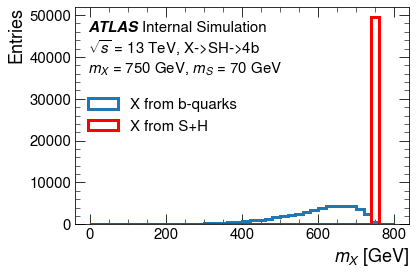

In [203]:
plt.hist(hh.mass,40,(0,800),label='X from b-quarks',histtype='step',lw=3)

plt.hist((H+S).mass,40,(0,800),color='r',label='X from S+H',histtype='step',lw=3)

plt.legend(fontsize=15,loc='center left')

plt.xlabel('$m_X$ [GeV]',fontsize=18,loc='right')
plt.ylabel('Entries',fontsize=18,loc='top')

fig = plt.gcf()
ax = plt.gca()
pas.makeATLAStag(ax, fig, first_tag=first_tag, 
                 second_tag=second_tag, line_spacing=1)


In [204]:
pas.makeATLAStag

<function PyATLASstyle.makeATLAStag(ax, fig, first_tag='', second_tag='', xmin=0.04, ymax=0.87, line_spacing=0.6)>

Text(0, 1, 'Entries')

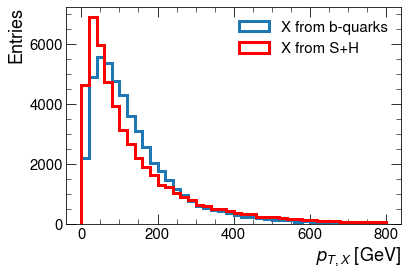

In [205]:
plt.hist(hh.pt,40,(0,800),label='X from b-quarks',histtype='step',lw=3)
plt.hist((H+S).pt,40,(0,800),color='r',label='X from S+H',histtype='step',lw=3)

plt.legend(fontsize=15)

plt.xlabel('$p_{T,X}$ [GeV]',fontsize=18,loc='right')
plt.ylabel('Entries',fontsize=18,loc='top')

# fig = plt.gcf()
# ax = plt.gca()
# pas.makeATLAStag(ax, fig, first_tag=first_tag, 
#                  second_tag=second_tag, line_spacing=1)



Text(1, 0, '$m_S$ [GeV]')

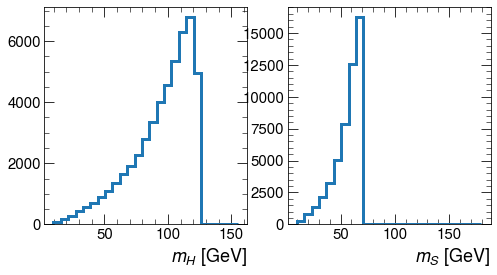

In [206]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.hist((bs[:,0]+bs[:,1]).mass,25,histtype='step',lw=3)
ax1.set_xlabel('$m_H$ [GeV]',fontsize=18,loc='right')

ax2.hist((bs[:,2]+bs[:,3]).mass,25,histtype='step',lw=3)
ax2.set_xlabel('$m_S$ [GeV]',fontsize=18,loc='right')


OK - it must be that these are the b-quarks after the radiation ...

In [207]:
# evts = t.arrays([''])

**Goal:** Check the truth matching code _here_

In [208]:
jarr = t.arrays(jcols, aliases=jalias, cut=f'(pt > 40) & (abs(eta) < 2.5)')

In [209]:
jalias

{'pt': 'recojet_antikt4_NOSYS_pt/1000',
 'eta': 'recojet_antikt4_NOSYS_eta',
 'phi': 'recojet_antikt4_NOSYS_phi',
 'm': 'recojet_antikt4_NOSYS_m/1000',
 'tag': 'recojet_antikt4_NOSYS_DL1dv00_FixedCutBEff_77',
 'NNJvt': 'recojet_antikt4_NOSYS_NNJvt',
 'flav': 'recojet_antikt4_NOSYS_HadronConeExclTruthLabelID'}

In [210]:
nJetsMax = 4

In [211]:
from truth import truthMatchJets, getCorrectPair

In [212]:
evts = t.arrays(['mcEventWeights'],library='pd')

In [213]:
np.unique(evts.mcEventWeights)

array([1.], dtype=float32)

In [214]:
j4 = ak.zip( { k: jarr[v] for k,v in vecDict.items() }, with_name="PtEtaPhiELorentzVector" )

idx = ak.argsort(jarr['tag'],ascending=False)
j4 = ak.zip( { k: jarr[v] for k,v in vecDict.items() }, with_name="PtEtaPhiELorentzVector" )
    
hc_jets = j4[idx[:,:nJetsMax]]

In [398]:
idx

<Array [[1, 3, 0, 2], [0, ... 2], [0, 1, 2, 3]] type='49520 * var * int64'>

<PtEtaPhiMLorentzVectorArray [[{pt: 331, ... mass: 6.63}]] type='22245 * var * P...'>

In [215]:
truthMatchJets(evts, hc_jets, b4, nJetsMax)

In [216]:
evts['njets'] = ak.num(jarr['pt']).to_numpy()
evts['ntag'] = ak.sum(jarr['tag'],axis=1).to_numpy()

In [217]:
getCorrectPair(evts, nJetsMax)

In [218]:
evts.head()

mcEventWeights  truth_mhh_bs  truth_pthh_bs  b0_jidx  b1_jidx  \
entry subentry                                                                  
0     0                    1.0    557.890320      88.864311        0        0   
1     0                    1.0    590.628479      53.614796        1        0   
2     0                    1.0    551.601868     264.590302        2        0   
3     0                    1.0    713.612976      87.835922        0        2   
4     0                    1.0    698.115906      37.109386        2        1   

                b2_jidx  b3_jidx  b0_drMatch  b1_drMatch  b2_drMatch  ...  \
entry subentry                                                        ...   
0     0               1        2    0.045487    2.080901    0.038495  ...   
1     0               2        2    0.016547    0.042449    0.249967  ...   
2     0               1        1    0.239170    0.061800    0.018730  ...   
3     0               3        1    0.036513    0.008792    0.096096  ...   
4     0               3        0    0.011006    0.013773    0.019802  ...   

                j0_bidx  j1_bidx  j2_bidx  j3_bidx  njets  ntag  correctPair  \
entry subentry                                                                 
0     0               0        2        3       -1      4     2           -1   
1     0               1        0        2       -1      4     2           -1   
2     0               1        2        0       -1      5     1           -1   
3     0               0        3        1        2      4     3            1   
4     0               3        1        0        2      5     4            5   

                unique  dRmatch  goodJets  
entry subentry                             
0     0          False    False     False  
1     0          False     True     False  
2     0          False    False     False  
3     0           True     True      True  
4     0           True     True      True  

[5 rows x 21 columns]

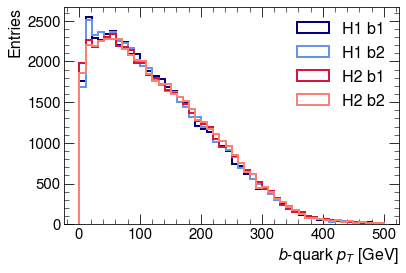

In [219]:
plt.hist(h1_bb['truth_bb_fromH1_pt'][:,0].to_numpy()/1000,
         50,(1,500),histtype='step',color='navy',
         lw=2,label='H1 b1')
plt.hist(h1_bb['truth_bb_fromH1_pt'][:,1].to_numpy()/1000,
         50,(1,500),histtype='step',
         lw=2,color='cornflowerblue',label='H1 b2')

plt.hist(h2_bb['truth_bb_fromH2_pt'][:,0].to_numpy()/1000,
         50,(1,500),histtype='step',lw=2,color='crimson',label='H2 b1')
plt.hist(h2_bb['truth_bb_fromH2_pt'][:,1].to_numpy()/1000,
         50,(1,500),histtype='step',lw=2,color='salmon',label='H2 b2')

plt.xlabel('$b$-quark $p_T$ [GeV]',fontsize=16,loc='right')
plt.ylabel('Entries',fontsize=16,loc='top')
plt.legend(fontsize=16)

Which is the S and which is the H?

Text(0, 0.5, 'Entries')

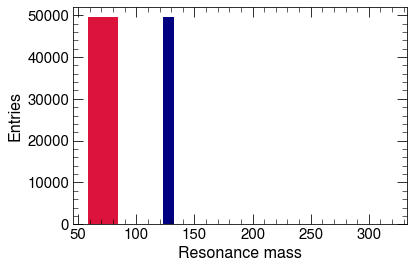

In [220]:
plt.hist(tarr['H1_m'].to_numpy(),color='navy')
plt.hist(tarr['H2_m'].to_numpy(),color='crimson')

plt.xlabel('Resonance mass',fontsize=16)
plt.ylabel('Entries',fontsize=16)

Conclusions: 
- H1 is the Higgs 
- H2 is the scalar 

In [221]:
np.unique(tarr['H1_pdgId'])

<Array [25] type='1 * int32'>

In [222]:
np.unique(tarr['H2_pdgId'])

<Array [35] type='1 * int32'>

**Cutflow:**
- Triggers + buckets
- 4 b-jets $p_T > 40$ GeV, $|\eta| < 2.5$, DL1d 77% WP, JvT cut?
- pairing alg (min dR, minimize Higgs mass)
- $\Delta \eta_{SH} < 1.5$
- $X_{Wt} > 1.5$
- SR

In [223]:
for k in t.keys():
    if 'recojet_antikt4_NOSYS' in k:
        print(k)

recojet_antikt4_NOSYS_pt
recojet_antikt4_NOSYS_eta
recojet_antikt4_NOSYS_phi
recojet_antikt4_NOSYS_m
recojet_antikt4_NOSYS_HadronConeExclTruthLabelID
recojet_antikt4_NOSYS_DL1dv00_FixedCutBEff_70
recojet_antikt4_NOSYS_DL1dv00_FixedCutBEff_77
recojet_antikt4_NOSYS_DL1dv00_FixedCutBEff_85
recojet_antikt4_NOSYS_GN120220509_FixedCutBEff_70
recojet_antikt4_NOSYS_GN120220509_FixedCutBEff_77
recojet_antikt4_NOSYS_GN120220509_FixedCutBEff_85
recojet_antikt4_NOSYS_nobjetcalib_pt
recojet_antikt4_NOSYS_nobjetcalib_eta
recojet_antikt4_NOSYS_nobjetcalib_phi
recojet_antikt4_NOSYS_nobjetcalib_m
recojet_antikt4_NOSYS_Jvt
recojet_antikt4_NOSYS_JvtRpt
recojet_antikt4_NOSYS_JVFCorr
recojet_antikt4_NOSYS_jvt_selection
recojet_antikt4_NOSYS_NNJvt
recojet_antikt4_NOSYS_NNJvtRpt
recojet_antikt4_NOSYS_NNJvtPass


In [224]:
jVars = [k  for k in t.keys() if 'recojet_antikt4_NOSYS' in k]

In [225]:
t.arrays(jVars)

<Array [{recojet_antikt4_NOSYS_pt: [, ... ] type='49520 * {"recojet_antikt4_NOSY...'>

In [226]:
jarr = t.arrays(jVars)

In [227]:
jarr['recojet_antikt4_NOSYS_pt']

<Array [[2.15e+05, 1.82e+05, ... 1.14e+04]] type='49520 * var * float32'>

In [228]:
jarr['recojet_antikt4_NOSYS_Jvt']

<Array [[0.988, 0.993, 0.964, ... 0.978, -0.1]] type='49520 * var * float32'>

In [229]:
jarr['recojet_antikt4_NOSYS_NNJvt']

<Array [[-1, -1, -1, -1, ... 0.0386, -1, -1]] type='49520 * var * float32'>

In [230]:
t.arrays(['recojet_antikt4_NOSYS_Jvt','recojet_antikt4_NOSYS_NNJvt'])

<Array [{recojet_antikt4_NOSYS_Jvt: [, ... ] type='49520 * {"recojet_antikt4_NOS...'>

In [231]:
t['recojet_antikt4_NOSYS_Jvt']

<TBranchElement 'recojet_antikt4_NOSYS_Jvt' at 0x7f3bedddcdc0>

In [232]:
t['recojet_antikt4_NOSYS_NNJvt']

<TBranchElement 'recojet_antikt4_NOSYS_NNJvt' at 0x7f3bee15a400>

OK -- the JVT cuts are given in this [twiki](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/PileupJetRecommendations).

For R22, the new recommendation is `NNJvt`, which has a cut that is flat in $\eta$ for each $p_T$ bin.

In [233]:
import json

In [234]:
%%bash
ls ../RRevolution/code/

analysis.py
dask-worker-space
getHashes.C
getMassplanes.py
hashMap.json
__init__.py
JVT
mdr.py
pairing_mva.py
preprocessUtils.py
processMNTs.py
__pycache__
steerGetMassplanes.py
steerProds.py
trigger.py
truth.py
utils.py
vbf.py


bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by bash)


For the JVT cut... I just need to write a string!

In [235]:
jvtFile = '../RRevolution/code/JVT/NNJVT.Cuts.FixedEffPt.Offline.Nonprompt_All_MaxW.json'

In [236]:
with open(jvtFile) as f:
    jvt_cuts = json.load(f)

In [237]:
jvt_cuts

{'cuts': {'(0, 0)': 0.27,
  '(0, 1)': 0.74,
  '(0, 2)': 0.74,
  '(0, 3)': 0.74,
  '(0, 4)': 0.27,
  '(1, 0)': 0.21,
  '(1, 1)': 0.73,
  '(1, 2)': 0.73,
  '(1, 3)': 0.73,
  '(1, 4)': 0.19,
  '(2, 0)': 0.11,
  '(2, 1)': 0.65,
  '(2, 2)': 0.6900000000000001,
  '(2, 3)': 0.66,
  '(2, 4)': 0.1,
  '(3, 0)': 0.07,
  '(3, 1)': 0.63,
  '(3, 2)': 0.75,
  '(3, 3)': 0.51,
  '(3, 4)': 0.07,
  '(4, 0)': 0.29,
  '(4, 1)': 0.34,
  '(4, 2)': 0.5700000000000001,
  '(4, 3)': 0.09,
  '(4, 4)': 0.05},
 'ptbin_edges': [20.00000586,
  24.08409573,
  29.8005357,
  39.46663572,
  62.0364041,
  198.02571875],
 'etabin_edges': [-2.4999998,
  -1.5580761,
  -0.50954574,
  0.51835537,
  1.5639215,
  2.4999998],
 'ptbin_eff': [0.88, 0.92, 0.96, 0.98, 0.995]}

Text(0.5, 0, 'recojet_antikt4_NOSYS_NNJvt')

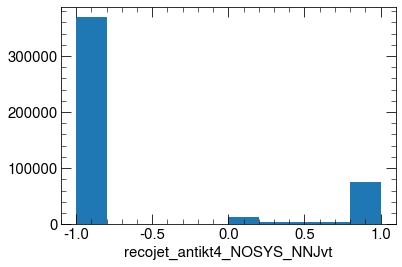

In [238]:
nnJvt = t.arrays('recojet_antikt4_NOSYS_NNJvt')
jvt = ak.flatten(nnJvt['recojet_antikt4_NOSYS_NNJvt'])

plt.hist(jvt)
plt.xlabel('recojet_antikt4_NOSYS_NNJvt')

Lots of jets with just -1... my guess is this is jets w/o any tracks!

In [239]:
pT_min = 40
eta_max = 2.5

In [240]:
jarr = t.arrays(jcols, aliases=jalias, cut=f'(pt > {pT_min}) & (abs(eta) < {eta_max}) & (tag == 1)')

In [241]:
len(ak.flatten(jarr['pt']))

127443

In [242]:
len(evts)

49520

In [243]:
jarr['tag']

<Array [[1, 1], [1, 1], ... 1, 1], [1, 1, 1]] type='49520 * var * int8'>

In [244]:
jalias

{'pt': 'recojet_antikt4_NOSYS_pt/1000',
 'eta': 'recojet_antikt4_NOSYS_eta',
 'phi': 'recojet_antikt4_NOSYS_phi',
 'm': 'recojet_antikt4_NOSYS_m/1000',
 'tag': 'recojet_antikt4_NOSYS_DL1dv00_FixedCutBEff_77',
 'NNJvt': 'recojet_antikt4_NOSYS_NNJvt',
 'flav': 'recojet_antikt4_NOSYS_HadronConeExclTruthLabelID'}

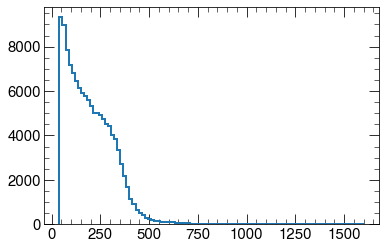

In [245]:
plt.hist(ak.flatten(jarr['pt'][jarr['tag']==1]),100,label='pass DL1d 77% WP',histtype='step',lw=2)
plt.show()

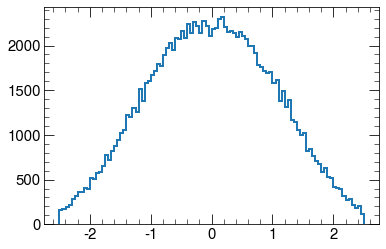

In [246]:
plt.hist(ak.flatten(jarr['eta'][jarr['tag']==1]),100,label='pass DL1d 77% WP',histtype='step',lw=2)
plt.show()

Text(0.5, 0, 'nnJvt')

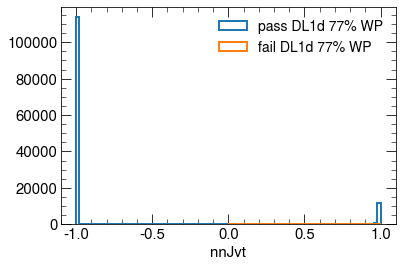

In [247]:
h = plt.hist(ak.flatten(jarr['NNJvt'][jarr['tag']==1]),100,label='pass DL1d 77% WP',histtype='step',lw=2)[0]
plt.hist(ak.flatten(jarr['NNJvt'][jarr['tag']==0]),100,label='fail DL1d 77% WP',histtype='step',lw=2)

plt.legend()
plt.xlabel('nnJvt')

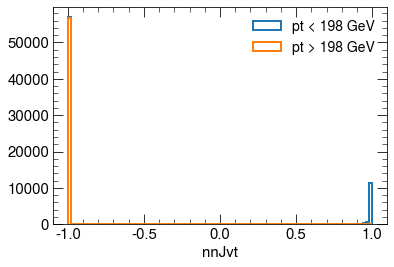

0.0


In [248]:
cut = 198

plt.hist(ak.flatten(jarr['NNJvt'][jarr['pt']<cut]),100,(-1,1),label=f'pt < {cut} GeV',histtype='step',lw=2)
h = plt.hist(ak.flatten(jarr['NNJvt'][jarr['pt']>cut]),100,(-1,1),label=f'pt > {cut} GeV',histtype='step',lw=2)[0]

plt.legend()
plt.xlabel('nnJvt')

plt.show()
print(h[-1])


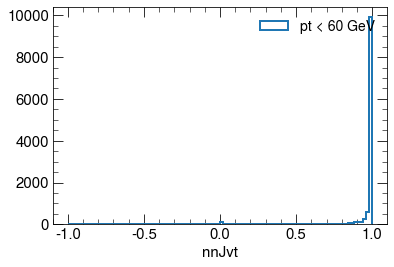

In [249]:
cut=60
plt.hist(ak.flatten(jarr['NNJvt'][jarr['pt']<cut]),100,(-1,1),label=f'pt < {cut} GeV',histtype='step',lw=2)

plt.legend()
plt.xlabel('nnJvt')

plt.show()


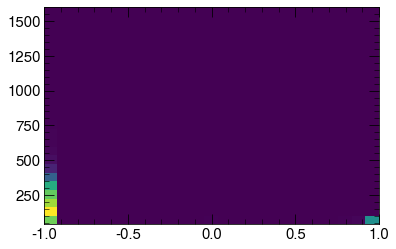

In [250]:
plt.hist2d(ak.flatten(jarr['NNJvt']),ak.flatten(jarr['pt']),25)
plt.show()

In [251]:
h[0]/h[-1]

<ipython-input-251-8b08e91119db>:1: RuntimeWarning: divide by zero encountered in double_scalars
  h[0]/h[-1]


inf

(array([1.1376e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.9500e+02, 1.1000e+02, 1.1800e+02, 2.3700e+02, 1.2923e+04]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [<matplotlib.patches.Polygon at 0x7f3bee97c400>])

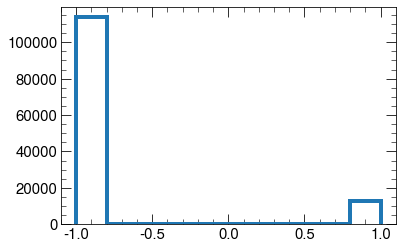

In [252]:
plt.hist(ak.flatten(jarr['NNJvt'][jarr['tag']==1]),label='pass DL1d 77% WP',histtype='step',lw=4)

**Message from Michael Holzbock**

Hi Nicole, this is a bit of an "artifact" of the training strategy if I remember correctly - there the pT was discretized according to some rule and fed as 1,2,3,... into the training. This yields then these "crude" bin boundaries of e.g. 62 GeV. When defining the WP we then chose a cut on the NNJvt score for each bin to match a particular target efficiency for HS jets.

But for pT > 60 GeV, there are barely any pile-up jets anyway so we decided to restrict the application up to 60 GeV which is the same value already used for Jvt in R21 (and a bit less crude than 62 GeV :slightly_smiling_face: )

So the cut values of the last pT bins in the file you pointed to are actually not used

**Conclusion:** Only apply the NNJvt cut up to 60 GeV.

In [253]:
ptbin_edges = jvt_cuts['ptbin_edges'][:-1]
ptbin_edges[-1] = 60

etabin_edges = jvt_cuts['etabin_edges']

cuts = jvt_cuts['cuts']

In [254]:
jvtStr = '(pt > 60)'

for i, (pt_min, pt_max) in enumerate(zip(ptbin_edges[:-1], ptbin_edges[1:])):
    for j, (eta_min, eta_max) in enumerate(zip(etabin_edges[:-1], etabin_edges[1:])):
        
        key = f'({i}, {j})'
        mlp_cut = jvt_cuts['cuts'][key]
        
        print(i,j,mlp_cut)
        
        jvtStr += f' | ( (pt>{pt_min}) & (pt<{pt_max}) & (eta>{eta_min}) & (eta<{eta_max}) & (NNJvt>{mlp_cut}))' 
        

0 0 0.27
0 1 0.74
0 2 0.74
0 3 0.74
0 4 0.27
1 0 0.21
1 1 0.73
1 2 0.73
1 3 0.73
1 4 0.19
2 0 0.11
2 1 0.65
2 2 0.6900000000000001
2 3 0.66
2 4 0.1
3 0 0.07
3 1 0.63
3 2 0.75
3 3 0.51
3 4 0.07


In [255]:
jvtStr

'(pt > 60) | ( (pt>20.00000586) & (pt<24.08409573) & (eta>-2.4999998) & (eta<-1.5580761) & (NNJvt>0.27)) | ( (pt>20.00000586) & (pt<24.08409573) & (eta>-1.5580761) & (eta<-0.50954574) & (NNJvt>0.74)) | ( (pt>20.00000586) & (pt<24.08409573) & (eta>-0.50954574) & (eta<0.51835537) & (NNJvt>0.74)) | ( (pt>20.00000586) & (pt<24.08409573) & (eta>0.51835537) & (eta<1.5639215) & (NNJvt>0.74)) | ( (pt>20.00000586) & (pt<24.08409573) & (eta>1.5639215) & (eta<2.4999998) & (NNJvt>0.27)) | ( (pt>24.08409573) & (pt<29.8005357) & (eta>-2.4999998) & (eta<-1.5580761) & (NNJvt>0.21)) | ( (pt>24.08409573) & (pt<29.8005357) & (eta>-1.5580761) & (eta<-0.50954574) & (NNJvt>0.73)) | ( (pt>24.08409573) & (pt<29.8005357) & (eta>-0.50954574) & (eta<0.51835537) & (NNJvt>0.73)) | ( (pt>24.08409573) & (pt<29.8005357) & (eta>0.51835537) & (eta<1.5639215) & (NNJvt>0.73)) | ( (pt>24.08409573) & (pt<29.8005357) & (eta>1.5639215) & (eta<2.4999998) & (NNJvt>0.19)) | ( (pt>29.8005357) & (pt<39.46663572) & (eta>-2.4999998

In [256]:
jarr2 = t.arrays(jcols, aliases=jalias, 
                 cut=f'(pt > {pT_min}) & (abs(eta) < {eta_max}) & (tag == 1) & ({jvtStr})')

In [257]:
# This is a little NN
# with open('../RRevolution/code/NNJVT.Network.graph.Offline.Nonprompt_All_MaxWeight.json') as f:
#     jvt_graph = json.load(f)

## Implement the trigger buckets

For now, compare the resonant and NR bucket decisions!

As a first pass, I have tested putting both the res and NR bucket calculations in the `processDf` function so that I can compare the efficiencies for a _single_ sample.


**Load in the 2018 signal**
<a name="reco-ana"></a>

In [8]:
fWild = f'{fDir}/user.dabattul.ntup_SH4b_AF3_24022023.{dsid}.Py8EG_A14NNPDF23LO_XHS_X750_S{mS}_4b.e8448_a899_{rtag}_p5511_TREE/'
fWild += 'user.dabattul.*._*.output-hh4b.root'

len(glob(fWild))

NameError: name 'fDir' is not defined

In [ ]:
fWild

In [ ]:
evts_list = []
hc_jets_list = []

for i,fname in enumerate(glob(fWild)):
    print(fname)
    evts, hc_jets = processDf(fname,min_btags=4,year=year) 

    evts_list.append(evts)
    hc_jets_list.append(hc_jets)
    
evts = pd.concat(evts_list)
hc_jets = ak.concatenate(hc_jets_list)

In [ ]:
hc_jets[:,0].energy

**Test the bucket code!**

In [ ]:
trig_yr = trigger_lut(year)
trig_cols = trig_yr.values()

bucket_config = bucket_config_generator(
    t_1b=trig_yr["1b"],
    t_2b1j=trig_yr["2b1j"],
    t_2bHT=trig_yr["2bHT"],
    t_2b2j=trig_yr["2b2j"],
)

In [ ]:
# for k in t.keys():
#     if 'trigPassed' in k:
#         print(k[11:])

In [ ]:
evts.columns

In [ ]:
total_cats =  evts.loc[evts.bucket>0,'mc_sf'].sum()

bucket_percentages = [(100 * evts.loc[evts['bucket'] == i,'mc_sf'].sum()/ total_cats, i) 
                      for i in range(1,5)]

In [ ]:
for p, b in bucket_percentages:
    print(p, b)

In [ ]:
bucket_names = {i+1:k  for i,k in enumerate(trig_yr.keys())}
bucket_names

In [ ]:
labels_with_p = []
percentages = []
for percentage, key in bucket_percentages:
    labels_with_p.append(str(bucket_names[key]) + ': {:.1f}%'.format(percentage))
    percentages.append(percentage)

In [ ]:
_  = plt.pie(percentages, labels = labels_with_p)
plt.title(f'Resonant buckets: $m_X$ = {mX} GeV, $m_S$ = {mS} GeV')
plt.savefig(f'figures/mX{mX}_mS{mS}/resBkts.pdf',bbox_inches='tight')

In [ ]:
OR_trig = False

for trig in trig_cols:
    OR_trig += evts[trig].values

In [ ]:
OR_trig

In [ ]:
evts.loc[OR_trig,'mc_sf'].sum()/total

In [ ]:
evts.loc[evts.bucket>0,'mc_sf'].sum()/total

In [ ]:
evts.head()

In [ ]:
evts.loc[evts.nr_bucket>0,'mc_sf'].sum()/total

In [ ]:
trig_yr

In [ ]:
OR_NR = False
for trig in [trig_yr['2b1j'],trig_yr['2b2j']]:
    OR_NR += evts[trig].values

In [ ]:
evts.loc[OR_NR,'mc_sf'].sum()/total

**OK, let's go ahead and get the NR pie chart**

In [ ]:
total_nr =  evts.loc[evts.nr_bucket>0,'mc_sf'].sum()

nr_bucket_percentages = [(100 * evts.loc[evts['nr_bucket'] == i,'mc_sf'].sum()/ total_nr, i) 
                      for i in [1,2]]

In [ ]:
nr_labels_with_p = []
nr_percentages = []
for percentage, key in nr_bucket_percentages:
    nr_labels_with_p.append(str(bucket_names[key]) + ': {:.1f}%'.format(percentage))
    nr_percentages.append(percentage)

In [ ]:
_  = plt.pie(nr_percentages, labels = nr_labels_with_p,colors=['C1','C3'])
plt.title(f'Non-resonant buckets: $m_X$ = {mX} GeV, $m_S$ = {mS} GeV')
plt.savefig(f'figures/mX{mX}_mS{mS}/nrBkts.pdf',bbox_inches='tight')

## (Re)implement a pairing strategy

**Idea:** Starting from `processDf`, let the `allPairs` function calculate the  minDR and minDHH baseline pairings.

In [ ]:
save_cols = ['njets', 'ntag', 'X_wt_tag', 'mc_sf','correctPair','bucket','nr_bucket']

In [ ]:
evts[save_cols].head()

In [ ]:
evt_dR = evts[save_cols].copy()

In [ ]:
evt_dH = evts[save_cols].copy()

In [ ]:
evt_all = evts[save_cols].copy()

In [ ]:
from analysis import getXhh, min_dH, do_min_dH, do_min_dR, do_min_dR_all, defineCuts,mH

In [ ]:
mS_SR_dict = {
                70  :  75,
                100 : 102,
                170 : 166,
                200 : 183,
                300 : 278,
                400 : 363,
                500 : 447
             }

In [ ]:
mS_SR = mS_SR_dict[mS]
mS_SR

In [ ]:
for df, pair_fct in zip([evt_dR,evt_dH,evt_all],[do_min_dR,do_min_dH,do_min_dR_all]):
    HC, SC = pair_fct(df,hc_jets)
    defineCuts(df,HC, SC, 125, mS)
    
# Also note... for mS < mH the labels are _switched_ so we need to redefine the correct definition
if (mS < mH):
    chosenPair = (evt_all['chosenPair'] +3 ) % 6
    evt_all['correct'] = (chosenPair == evt_all['correctPair'])

In [ ]:
from plotUtils import rainbow_text
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
mS,mH

In [ ]:
df.mc_sf

In [ ]:
lw=2.5

colors = ['darkorange','navy','limegreen']

for p, alt_p,xtext in zip(['H','S'],['S','H'],[75,200]):
    
    all_text = ['All pairs:       ','$\mu$    median   $\sigma$   ']
    cor_text = ['Correct pairs:   ','$\mu$    median   $\sigma$   ']
    
    plt.figure(figsize=(8,6))
    
    for df, c, l in zip([evt_dR,evt_dH, evt_all],colors,['dR','dH','dR_all']):
    
        col = f'm_{p}' 
    
        '''
        It's a bit clumsy convention (for now)... but the "H" in the
        name is the pair with the smaller dR, so if the mS signal hypo
        is smaller then the "S" will be the one with the _smaller_ dR 
        and what is "H" in the df
        '''
        if (l == 'dR_all') and (mS < mH):
            print('The S cand has the smaller dR')
            col = f'm_{alt_p}'
    
    
        r = (20,200)
        if p=='S' and (mS > mH):
            r = (.5*mS,1.2*mS)
    
        h_all = plt.hist(df[col],60,r,label=f'min_{l}: all pairs',
                 color=c,ls='dotted',histtype='step',lw=lw,
                 weights=L[year]*df['mc_sf'])[0]
        
        v,w = df[[col,'mc_sf']].values.T

        weighted_stats = DescrStatsW(v, weights=w, ddof=0)

        mu = weighted_stats.mean
        median = weighted_stats.quantile(.5).values[0]
        std = weighted_stats.std

        all_text.append(f'{mu : .1f} {median: .1f} {std: .1f}')
        
        h_cor = plt.hist(df.loc[df.correct,col],
                 60,(20,200),label=f'min_{l}: correct pairs',
                 color=c,histtype='step',lw=lw,
                 weights=L[year]*df.loc[df.correct,'mc_sf'])[0]
    
        v,w = df.loc[df.correct,[col,'mc_sf']].values.T

        weighted_stats = DescrStatsW(v, weights=w, ddof=0)

        mu = weighted_stats.mean
        median = weighted_stats.quantile(.5).values[0]
        std = weighted_stats.std

        cor_text.append(f'{mu : .1f} {median: .1f} {std: .1f}')
    
    plt.xlabel(f'$m_{p}$ [GeV]',loc='right',fontsize=18)
    plt.ylabel('Entries',loc='top',fontsize=18)
    plt.legend(labelspacing=.1)
        
    _, ymax = plt.ylim()
    ylim = 0,1.4*ymax
    plt.ylim(ylim)
    
        
    fig = plt.gcf()
    ax = plt.gca()
    pas.makeATLAStag(ax, fig, first_tag=first_tag, 
                     second_tag=second_tag, line_spacing=1)

    # Annotate the figure
    rainbow_text(xtext, 0.8*ymax, all_text, ['k']*2+colors, ax=ax,ha='right', yoffset=1)
    rainbow_text(xtext, 0.45*ymax, cor_text, ['k']*2+colors, ax=ax,ha='right', yoffset=1)
    
    plt.savefig(f'figures/mX{mX}_mS{mS}/{col}_all.pdf',bbox_inches='tight')
    
    plt.show()

**Q:** What does min $\Delta m_H$ have fewer events??

Oh, it just (funnily enough) looks like it is not correct as often lol.

Wow ... this seems pretty good!!

**Add some extra cuts!**

In [ ]:
# The res bucket cut
for p, alt_p,xtext in zip(['H','S'],['S','H'],[75,200]):
    
    all_text = ['All pairs:       ','$\mu$    median   $\sigma$   ']
    cor_text = ['Correct pairs:   ','$\mu$    median   $\sigma$   ']
    
    plt.figure(figsize=(8,6))
    
    for df, c, l in zip([evt_dR,evt_dH, evt_all],colors,['dR','dH','dR_all']):
    
        col = f'm_{p}' 
    
        if (l == 'dR_all') and (mS < mH):
            print('The S cand has the smaller dR')
            col = f'm_{alt_p}'
        

        mask = df.bucket > 0

        r = (20,200) if p == 'H' else (20,mX)

        plt.hist(df.loc[mask,col],60,r,label=f'min_{l}: all pairs',
                 color=c,ls='dotted',histtype='step',lw=lw,
                 weights=L[year]*df.loc[mask,'mc_sf'])

        v,w = df.loc[mask,[col,'mc_sf']].values.T

        weighted_stats = DescrStatsW(v, weights=w, ddof=0)

        mu = weighted_stats.mean
        median = weighted_stats.quantile(.5).values[0]
        std = weighted_stats.std

        all_text.append(f'{mu : .1f} {median: .1f} {std: .1f}')

        plt.hist(df.loc[mask&df.correct,col],
                 60,r,label=f'min_{l}: correct pairs',
                 color=c,histtype='step',lw=lw,
                 weights=L[year]*df.loc[mask&df.correct,'mc_sf'])

        v,w = df.loc[mask&df.correct,[col,'mc_sf']].values.T

        weighted_stats = DescrStatsW(v, weights=w, ddof=0)

        mu = weighted_stats.mean
        median = weighted_stats.quantile(.5).values[0]
        std = weighted_stats.std

        cor_text.append(f'{mu : .1f} {median: .1f} {std: .1f}')

    plt.xlabel(f'$m_{p}$ [GeV]',loc='right',fontsize=18)
    plt.ylabel('Entries / 3 GeV',loc='top',fontsize=18)
    plt.legend(labelspacing=.1)

    _, ymax = plt.ylim()
    ylim = 0,1.4*ymax
    plt.ylim(ylim)


    fig = plt.gcf()
    ax = plt.gca()
    pas.makeATLAStag(ax, fig, first_tag=first_tag, 
                     second_tag=second_tag+'\nResonant trigger buckets', line_spacing=1)

    # Annotate the figure
    rainbow_text(xtext, 0.8*ymax, all_text, ['k']*2+colors, ax=ax,ha='right', yoffset=1)
    rainbow_text(xtext, 0.45*ymax, cor_text, ['k']*2+colors, ax=ax,ha='right', yoffset=1)

#     figDir
    
#     plt.savefig(f'figures/mX{mX}_mS{mS}/res_bkts/{col}_all.pdf',bbox_inches='tight')
    
    plt.show()

In [ ]:
df = evt_all
mask = (df.bucket > 0)&(df.dEta_SH < 1.5)&(df.X_wt_tag > 1.5)
np.sum(mask)

In [ ]:
49520+66110

In [ ]:
# The res bucket + dEta + Xwt
extra_text = '\nRes bkts, $\Delta \eta_{SH} < 1.5$, $X_{Wt}$ > 1.5'

# The res bucket cut
for p, alt_p,xtext in zip(['H','S'],['S','H'],[75,200]):
    
    all_text = ['All pairs:       ','$\mu$    median   $\sigma$   ']
    cor_text = ['Correct pairs:   ','$\mu$    median   $\sigma$   ']
    
    plt.figure(figsize=(8,6))
    
    for df, c, l in zip([evt_dR,evt_dH, evt_all],colors,['dR','dH','dR_all']):
    
        col = f'm_{p}' 
    
        if (l == 'dR_all') and (mS < mH):
            print('The S cand has the smaller dR')
            col = f'm_{alt_p}'
            
        mask = (df.bucket > 0)&(df.dEta_SH < 1.5)&(df.X_wt_tag > 1.5)

        r = (20,200) if p == 'H' else (20,mX)
        
        plt.hist(df.loc[mask,col],60,r,label=f'min_{l}: all pairs',
                 color=c,ls='dotted',histtype='step',lw=lw,
                 weights=L[year]*df.loc[mask,'mc_sf'])

        v,w = df.loc[mask,[col,'mc_sf']].values.T

        weighted_stats = DescrStatsW(v, weights=w, ddof=0)

        mu = weighted_stats.mean
        median = weighted_stats.quantile(.5).values[0]
        std = weighted_stats.std

        all_text.append(f'{mu : .1f} {median: .1f} {std: .1f}')

        plt.hist(df.loc[mask&df.correct,col],
                 60,r,label=f'min_{l}: correct pairs',
                 color=c,histtype='step',lw=lw,
                 weights=L[year]*df.loc[mask&df.correct,'mc_sf'])

        v,w = df.loc[mask&df.correct,[col,'mc_sf']].values.T

        weighted_stats = DescrStatsW(v, weights=w, ddof=0)

        mu = weighted_stats.mean
        median = weighted_stats.quantile(.5).values[0]
        std = weighted_stats.std

        cor_text.append(f'{mu : .1f} {median: .1f} {std: .1f}')

    plt.xlabel(f'$m_{p}$ [GeV]',loc='right',fontsize=18)
    plt.ylabel('Entries / 3 GeV',loc='top',fontsize=18)
    plt.legend(labelspacing=.1)

    _, ymax = plt.ylim()
    ylim = 0,1.4*ymax
    plt.ylim(ylim)


    fig = plt.gcf()
    ax = plt.gca()
    pas.makeATLAStag(ax, fig, first_tag=first_tag, 
                     second_tag=second_tag+extra_text, line_spacing=1)

    # Annotate the figure
    rainbow_text(xtext, 0.8*ymax, all_text, ['k']*2+colors, ax=ax,ha='right', yoffset=1)
    rainbow_text(xtext, 0.45*ymax, cor_text, ['k']*2+colors, ax=ax,ha='right', yoffset=1)

    # plt.savefig(f'figures/mX{mX}_mS{mS_SR}/res_bkts_deta_Xwt/{col}_all.pdf',bbox_inches='tight')
    
    plt.show()

## $X_{SH}$ plot

0.43720135
0.3988157
0.3913593


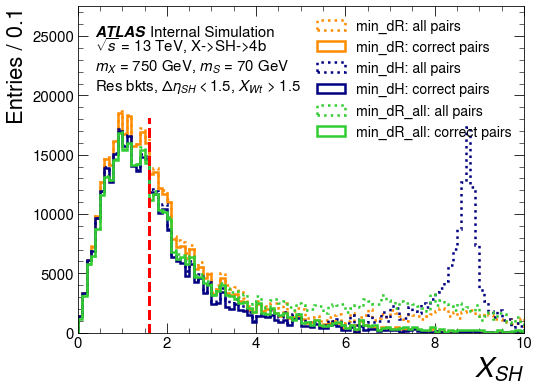

In [54]:
c2 = mS_SR

for i,df in enumerate([evt_dR,evt_dH,evt_all]):

    if i==2 and (mS < mH):
        # For the min_dR_all alg, if mS < mH, the smaller opening angle is the S
        # and we flip the notation
        df['X_SH'] = getXhh(df.m_S, df.m_H, c1=125, c2=c2)
    else:
        df['X_SH'] = getXhh(df.m_H, df.m_S, c1=125, c2=c2)
        
# The res bucket + dEta + Xwt
extra_text = '\nRes bkts, $\Delta \eta_{SH} < 1.5$, $X_{Wt}$ > 1.5'


col = f'X_SH'
r = (0,10)

all_text = ['All pairs:       ','$\mu$    median   $\sigma$   ']
cor_text = ['Correct pairs:   ','$\mu$    median   $\sigma$   ']

plt.figure(figsize=(8,6))

for df, c, l in zip([evt_dR,evt_dH,evt_all],colors,['dR','dH','dR_all']):


    mask = (df.bucket > 0)&(df.dEta_SH < 1.5)&(df.X_wt_tag > 1.5)

    num = df.loc[mask & (df.X_SH < 1.6),'mc_sf'].sum()
    den = df.loc[mask,'mc_sf'].sum()
    print(num / den)
    
    plt.hist(df.loc[mask,col],100,r,label=f'min_{l}: all pairs',
             color=c,ls='dotted',histtype='step',lw=lw,
             weights=L[year]*df.loc[mask,'mc_sf'])

    plt.hist(df.loc[mask&df.correct,col],
             100,r,label=f'min_{l}: correct pairs',
             color=c,histtype='step',lw=lw,
             weights=L[year]*df.loc[mask&df.correct,'mc_sf'])


plt.xlabel('$X_{SH}$',loc='right',fontsize=28)
plt.ylabel('Entries / 0.1',loc='top',fontsize=22)
plt.legend()


plt.xlim(r)

_, ymax = plt.ylim()
ylim = 0,1.4*ymax
plt.ylim(ylim)

plt.plot([1.6]*2,[0,.92*ymax],'r--',lw=lw)

fig = plt.gcf()
ax = plt.gca()
pas.makeATLAStag(ax, fig, first_tag=first_tag, ymax=.9,
                 second_tag=second_tag+extra_text, line_spacing=1)

plt.savefig(f'figures/mX{mX}_mS{mS_SR}/X_SH_125_{c2}_all.pdf',bbox_inches='tight')
    
plt.show()

In [55]:
np.sqrt(((mH-mS)/(0.1*mH))**2 + ((mH-mS)/(0.1*mS))**2 )

9.005259234333625